In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.listdir('/content/drive/MyDrive/archive (16)')

['cleaned_age.csv', 'cleaned_emotion.csv', 'cleaned_gender.csv']

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
print('Drive unmounted.')
drive.mount('/content/drive')
print('Drive remounted.')

Drive unmounted.
Mounted at /content/drive
Drive remounted.


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/archive (16)/cleaned_gender.csv')

In [ ]:
# Separate features and labels
X = df.drop('label', axis=1).values
y = df['label'].values

In [ ]:
# Reshape input to 3D for LSTM [samples, time_steps, features]
# The current shape of X is (4361, 21)
# We need to find suitable time_steps and features such that time_steps * features = 21
# For example, we can use time_steps = 7 and features = 3 (or time_steps = 3 and features = 7, etc.)
# Adjust these values based on the structure of your input data

# Correcting features to match the expected column size
time_steps = 7
features = 3

X_reshaped = X.reshape(X.shape[0], time_steps, features)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_categorical, test_size=0.2, random_state=42)

In [ ]:
# Build LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(64))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 7, 128)         │        67,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,138 (465.38 KB)

 Trainable params: 119,138 (465.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

Epoch 1/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.7545 - loss: 0.5662 - val_accuracy: 0.7904 - val_loss: 0.5131
Epoch 2/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7583 - loss: 0.5451 - val_accuracy: 0.7904 - val_loss: 0.5230
Epoch 3/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7501 - loss: 0.5558 - val_accuracy: 0.7904 - val_loss: 0.5059
Epoch 4/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7597 - loss: 0.5489 - val_accuracy: 0.7904 - val_loss: 0.5067
Epoch 5/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7750 - loss: 0.5237 - val_accuracy: 0.7904 - val_loss: 0.5194
Epoch 6/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7656 - loss: 0.5323 - val_accuracy: 0.7904 - val_loss: 0.5188
Epoch 7/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7707 - loss: 0.5270 - val_accuracy: 0.7904 - val_loss: 0.5024
Epoch 8/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.7528 - loss: 0.5479 - val_accu

In [ ]:
# Import necessary metrics functions
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Predict the classes for test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get class with highest probability

# Get true classes
y_true = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes, average='weighted')  # Weighted average for imbalanced classes
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1-Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Accuracy: 85.68%
F1-Score: 0.85
Precision: 0.85
Recall: 0.86


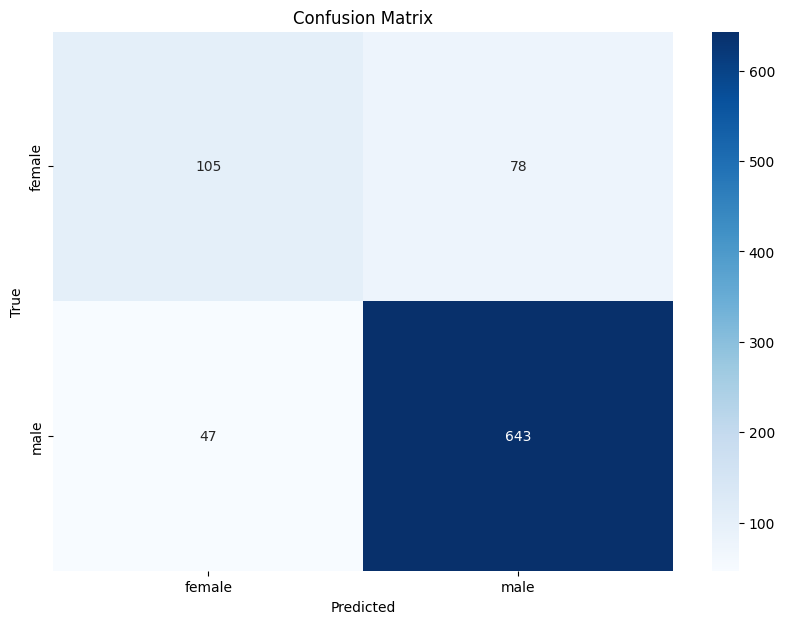

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming 'y' is the original list of emotion labels before encoding
# If 'y' is not available, you'll need to load or recreate it.
# Example: y = [...] # Load your original emotion labels here

# Create and fit LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

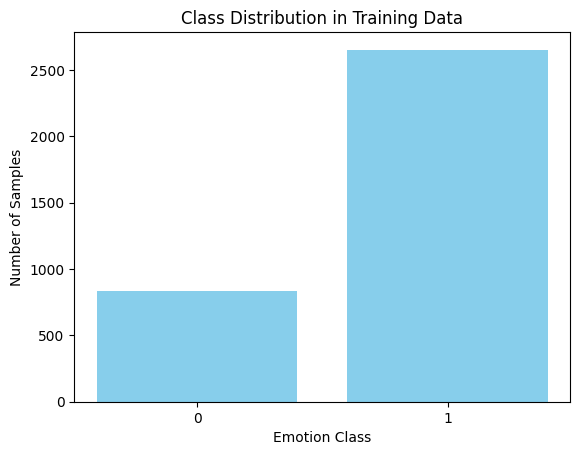

Class Distribution: Counter({np.int64(1): 2653, np.int64(0): 835})


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Assuming y_train contains emotion labels (one-hot or encoded as numbers)
labels = np.argmax(y_train, axis=1)  # Convert one-hot to integer labels

# Count occurrences of each class
class_counts = Counter(labels)

# Plot the distribution
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel("Emotion Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Training Data")
plt.xticks(range(len(class_counts)))
plt.show()

# Print class-wise counts
print("Class Distribution:", class_counts)


In [ ]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# 1. Define Baseline Accuracy:
baseline_accuracy = 0.25  # Replace with your actual baseline accuracy

# 3. Number of Samples:
n_samples = len(y_true)

# 4. Perform Z-test:
count = int(accuracy * n_samples)  # Number of successful predictions
nobs = n_samples  # Total number of samples
stat, p_value = proportions_ztest(count, nobs, value=baseline_accuracy, alternative='larger')  # One-tailed test for improvement

# 5. Print Results:
print(f"Z-statistic: {stat:.2f}")
print(f"P-value: {p_value:.3f}")

# 6. Interpret Results:
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject null hypothesis: Model accuracy is significantly better than baseline.")
else:
    print("Fail to reject null hypothesis: Model accuracy is not significantly better than baseline.")

Z-statistic: 51.19
P-value: 0.000
Reject null hypothesis: Model accuracy is significantly better than baseline.


In [ ]:
import numpy as np
from scipy import stats

# 1. Define Baseline Accuracy:
baseline_accuracy = 0.25  # Replace with your actual baseline accuracy

# 3. Number of Samples:
n_samples = len(y_true)

# 4. Calculate Standard Error:
# This is an approximation for proportions
standard_error = np.sqrt((accuracy * (1 - accuracy)) / n_samples)

# 5. Perform T-test:
t_statistic, p_value = stats.ttest_1samp(
    [accuracy], baseline_accuracy  # Sample data and population mean
)

# 6. Print Results:
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

# 7. Interpret Results:
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject null hypothesis: Model accuracy is significantly different from baseline.")
else:
    print("Fail to reject null hypothesis: Model accuracy is not significantly different from baseline.")
    # Removed the invalid "print sum value" statement

T-statistic: nan
P-value: nan
Fail to reject null hypothesis: Model accuracy is not significantly different from baseline.


In [ ]:
import numpy as np
from scipy import stats

# 1. Define Baseline Accuracy:
baseline_accuracy = 0.25  # Replace with your actual baseline accuracy

# 3. Number of Samples:
n_samples = len(y_true)

# 4. Calculate Standard Error:
# This is an approximation for proportions
standard_error = np.sqrt((accuracy * (1 - accuracy)) / n_samples)

# 5. Perform T-test:
# Ensure 'accuracy' is a single numeric value, not a list
t_statistic, p_value = stats.ttest_1samp(
    y_true, baseline_accuracy  # Pass y_true (or its mean) instead of [accuracy]
)

# 6. Print Results:
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

# 7. Interpret Results:
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject null hypothesis: Model accuracy is significantly different from baseline.")
else:
    print("Fail to reject null hypothesis: Model accuracy is not significantly different from baseline.")

T-statistic: 39.20
P-value: 0.000
Reject null hypothesis: Model accuracy is significantly different from baseline.
